In [31]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
np.random.seed(0)
data=np.random.rand(100,2)
k=3
kmeans=KMeans(n_clusters=k)
kmeans.fit(data)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

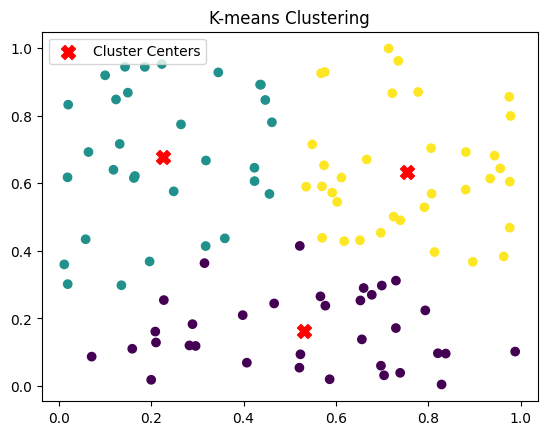

In [33]:
centers=kmeans.cluster_centers_
labels=kmeans.labels_
plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='red',marker='X',s=100,label='Cluster Centers')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [34]:
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [35]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [36]:
text_data=["Natural language processing is a subfield of artificial intelligence."
"Text mining involves extracting meaningful information from unstructured text data."
"Hachine learning algorithms can be applied to analyze text data.",
"NLP tasks include sentiment analysis, named entity recognition, and language translation.",
"K-means clustering is a popular unsupervised machine learning algorithm."]

In [37]:
def preprocess_text(text_data):
    stop_words=set(stopwords.words('english'))
    preprocessed_data=[]
    for text in text_data:
        words=word_tokenize(text.lower())
        filtered_words=[word for word in words if word.isalnum() and word not in stop_words]
        preprocessed_data.append(filtered_words)
    return preprocessed_data
preprocessed_data=preprocess_text(text_data)
unique_words=sorted(set(word for sublist in preprocessed_data for word in sublist))
one_hot_vectors=np.zeros((len(preprocessed_data),len(unique_words)))
for i,words in enumerate(preprocessed_data):
   for word in words:
       one_hot_vectors[i,unique_words.index(word)]=1
k=2
kmeans=KMeans(n_clusters=k)
kmeans.fit(one_hot_vectors)
centers=kmeans.cluster_centers_

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


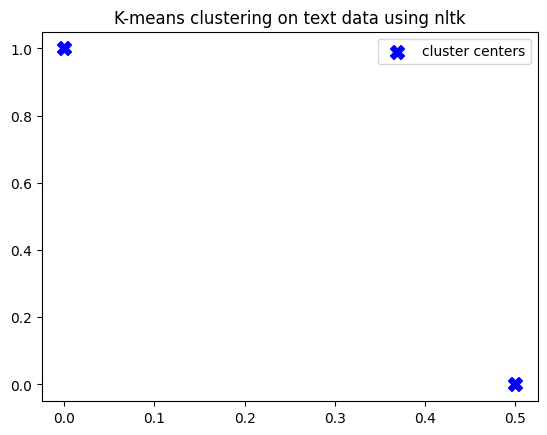

In [38]:
labels=kmeans.labels_
plt.scatter(centers[:,0],centers[:,1],c='blue',marker='X',s=100,label='cluster centers')
plt.title('K-means clustering on text data using nltk')
plt.legend()
plt.show()